# Indonesia key players


## Maarten Paes


#### Import necessary libraries


In [40]:
import json
import pandas as pd



from matplotlib.colors import LinearSegmentedColormap


import matplotlib.pyplot as plt


import matplotlib.font_manager as fm



from PIL import Image


from mplsoccer import PyPizza, add_image

#### Import the csv files


In [22]:
MLSGoalkeeping = pd.read_csv(
    "./Data/2024_MLS_Goalkeeping.csv", sep=",", encoding="utf-8"
)
MLSAdvancedGK = pd.read_csv(
    "./Data/2024_MLS_AdvGoalkeeping.csv", sep=",", encoding="utf-8"
)

In [23]:
goalkeepingStats = pd.merge(
    MLSGoalkeeping,
    MLSAdvancedGK,
    on=["Player", "Nation", "Pos", "Squad", "Min", "90s"],
    how="inner",
    suffixes=("_x", "_y"),
)

In [24]:
# Convert minutes played to integer
goalkeepingStats["Min"] = goalkeepingStats["Min"].str.replace(",", "").astype(int)

#### Store the relevant columns


In [25]:
# A list to store the relevant columns
gkColumns = [
    "Player",
    "Squad",
    "Min",
    "90s",
    # Goalkeeping stats
    "GA_x",  # Goals conceded
    "SoTA",  # Shots on target faced
    "Save%",  # Save percentage
    "PSxG",  # Post-shot expected goals
    "PSxG/SoT",  # Conceded shots difficulty
    "PSxG+/-",  # Over/underperformance
    "#OPA",  # Defensive actions outside the penalty area
    "AvgDist",  # Average distance of defensive actions
    # Distribution stats
    "PassAtt",  # Passes attempted
    "PassLaunch%",  # % of Passes launched
    "AvgLen",  # Average length of passes
    "LnchAtt",  # Launches attempted
    "LnchCmp%",  # % of launches completed
    "GKAtt",  # Goal kicks attempted
    "GKLaunch%",  # % of goal kicks launched
    "GKAvgLen",  # Average length of goal kicks
    "Thr",  # Throws attempted
    # Handling stats
    "CrsOpp",  # Crosses faced
    "CrsStp%",  # % of crosses stopped
]

#### Retain only goalkeepers and relevant columns


In [26]:
goalkeepingStats = goalkeepingStats[gkColumns]

#### Filter data


In [27]:
# Set a minutes played threshold
threshold = 1000
# Filter players who have played equal to or more than the threshold
mlsGKs = goalkeepingStats[goalkeepingStats["Min"].astype(int) >= threshold].reset_index(
    drop=True
)

In [28]:
# Drop columns that are not needed for the pizza chart
columns_to_drop = [
    "Squad",
    "Min",
    "90s",
    "Save%",
    "PSxG",
    "PassLaunch%",
    "LnchAtt",
    "GKAtt",
]

mlsGKs = mlsGKs.drop(columns=columns_to_drop)

In [29]:
mlsGKs.head()

,Player,GA_x,SoTA,PSxG/SoT,PSxG+/-,#OPA,AvgDist,PassAtt,AvgLen,LnchCmp%,GKLaunch%,GKAvgLen,Thr,CrsOpp,CrsStp%
0,Alex Bono,1.78,4.26,0.37,-0.08,2.04,20.3,30.1,41.7,48.2,88.4,59.2,3.65,11.5,4.2
1,Christopher Brady,1.81,5.15,0.29,-0.08,0.81,14.4,20.1,33.1,32.2,52.6,42.8,4.85,11.5,6.1
2,Roman Bürki,1.75,4.68,0.37,0.17,1.48,16.6,28.2,38.0,36.2,52.9,45.3,3.88,12.2,2.5
3,Drake Callender,1.38,4.54,0.29,0.17,0.69,11.0,26.5,28.4,29.9,30.4,31.4,5.04,13.3,9.0
4,Roman Celentano,1.30,4.17,0.28,0.09,0.74,12.8,21.3,29.6,36.9,30.8,30.2,4.70,13.0,7.7


In [30]:
# Perform relevant calculations

## Calculate the percentile rank of each player for each stat
subjectPercentiles = mlsGKs.rank(pct=True, na_option="top")

## Inverse rank for some stats (conceded goals per 90, shots on target against per 90, post-shot xG per 90)
subjectPercentiles["GA_x"] = 1 - subjectPercentiles["GA_x"]
subjectPercentiles["SoTA"] = 1 - subjectPercentiles["SoTA"]
# subjectPercentiles["PSxG"] = 1 - subjectPercentiles["PSxG"]

### Times the percentiles by 100 to get the percentile rank
subjectPercentiles = subjectPercentiles * 100

### Replace Player column with the player names
subjectPercentiles["Player"] = mlsGKs["Player"]

### Round the ranks
subjectPercentiles = subjectPercentiles.round(0)

## Retrieve the min and max ranges for each stat
subjectMinRanges = subjectPercentiles.min()
subjectMaxRanges = subjectPercentiles.max()

## Drop the ranges for the Player column
subjectMinRanges = subjectMinRanges.drop("Player")
subjectMaxRanges = subjectMaxRanges.drop("Player")

## Retrieve the names of the parameters (except for player names)
subjectParams = subjectPercentiles.columns[1:]

#### Prepare the plot


In [31]:
# Extract the ranks for Maarten Paes...
MaartenPaes = subjectPercentiles[subjectPercentiles["Player"] == "Maarten Paes"].drop(
    columns="Player"
)

# ...and retrieve the values as a list
MaartenPaesValues = MaartenPaes.values.tolist()[0]

In [32]:
# Rename the params to make them more readable,
# remove the "per 90" suffix,
# and add line breaks where necessary
subjectParams = [
    "Conceded goals",
    "Shots on target\nfaced",
    "Conceded shots\ndifficulty",
    "PSxG\noverperformance",
    "Def.actions\noutside pen. box",
    "Avg. def. actions\ndistance",
    "Passes\nattempted",
    "Avg. pass\nlength",
    "Launches\ncompleted %",
    "Goal kicks\nlaunched %",
    "Avg. goal\nkick length",
    "Throws\nattempted",
    "Crosses\nfaced",
    "Crosses\nstopped %",
]

In [33]:
# Import the fonts
robotoLight = fm.FontProperties(fname="./Roboto-Light.ttf")
robotoRegular = fm.FontProperties(fname="./Roboto-Regular.ttf")
robotoBold = fm.FontProperties(fname="./Roboto-Bold.ttf")

In [34]:
# Import the image
imageLink = "./Images/MaartenPaes.png"
maartenPaes = Image.open(imageLink)

<Axes: >

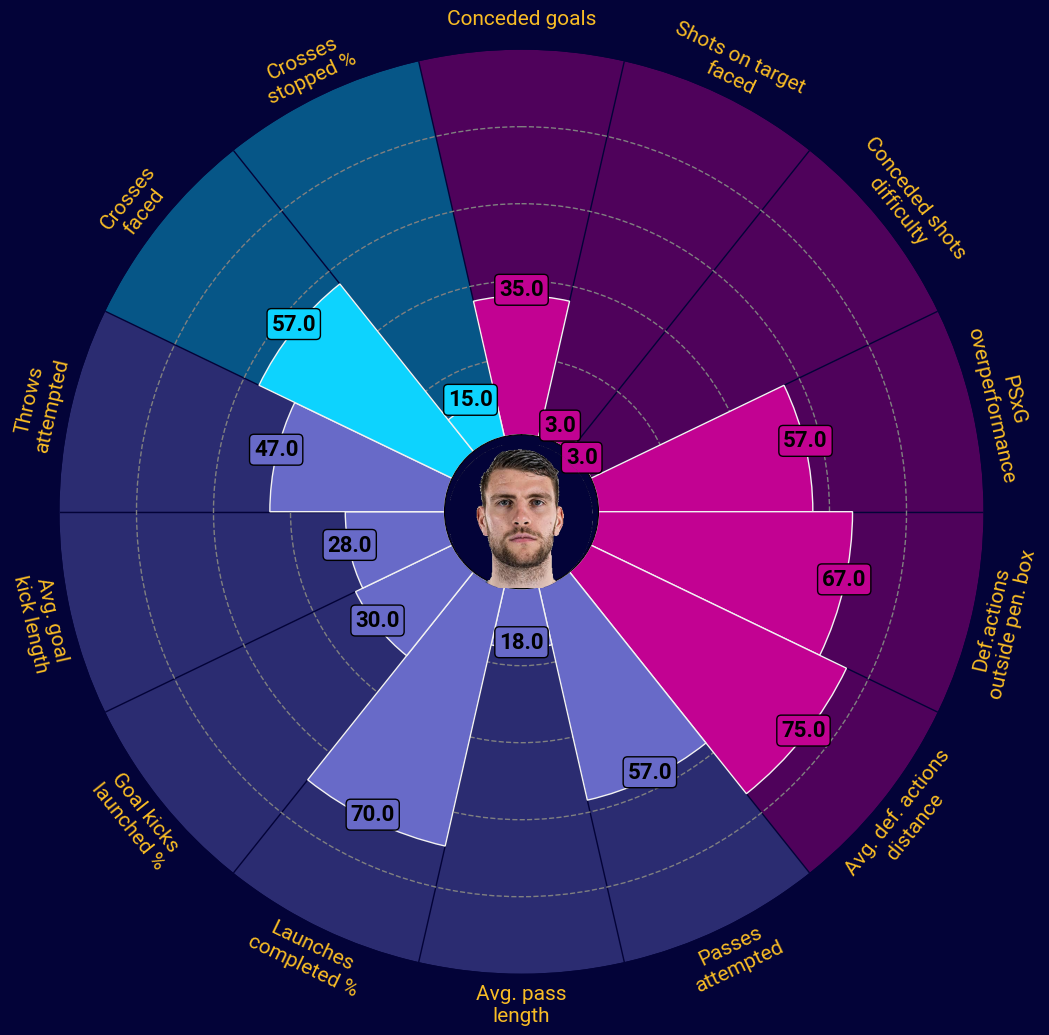

In [35]:
# Create the pizza chart

## Instantiate PyPizza class
baker = PyPizza(
    params=subjectParams,  # list of parameters
    background_color="#030338",  # background color
    min_range=subjectMinRanges,
    max_range=subjectMaxRanges,
    straight_line_color="#030338",  # color for straight lines
    straight_line_lw=1,  # linewidth for straight lines
    last_circle_lw=0,  # linewidth of last circle
    other_circle_ls="--",  # linestyle for other circles
    other_circle_lw=1,  # linewidth for other circles
    inner_circle_size=20,  # size of inner circle
)

## Create a colormap
colors = ["#c20292", "#0dd3fe"]
cmap = LinearSegmentedColormap.from_list("TokyoNight", colors, N=len(subjectParams))
slice_colors = ["#c20292"] * 6 + ["#686ac8"] * 6 + ["#0dd3fe"] * 2
text_colors = ["#000000"] * len(slice_colors)

# Plot the pizza chart
fig, ax = baker.make_pizza(
    MaartenPaesValues,
    figsize=(12, 12),
    color_blank_space="same",
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#F9BD25", fontsize=15, fontproperties=robotoRegular, va="center"
    ),  # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000",
        fontsize=16,
        fontproperties=robotoBold,
        zorder=3,
        bbox=dict(
            edgecolor="#000000",
            facecolor="cornflowerblue",
            boxstyle="round,pad=0.2",
            lw=1,
        ),
    ),  # values to be used when adding parameter-values
)

## Add title and auto adjust title to be in the center of the plot
# fig.text(
#     0.505,
#     1,
#     "Maarten Paes | 2024 MLS Season",
#     fontsize=30,
#     fontproperties=robotoBold,
#     color="white",
#     ha="center",
# )

## Add a subtitle and auto adjust subtitle to be in the center of the plot
# fig.suptitle(
#     "After 28 matches | {minutesPlayed} minutes played | All stats are percentile ranks & per 90".format(
#         minutesPlayed=goalkeepingStats[goalkeepingStats["Player"] == "Maarten Paes"][
#             "Min"
#         ].values[0]
#     ),
#     fontsize=17,
#     fontproperties=robotoLight,
#     color="white",
#     ha="center",
# )

# add text
# fig.text(
#     0.34,
#     0.925,
#     "Goalkeeping        Distribution         Handling",
#     size=14,
#     fontproperties=robotoBold,
#     color="white",
# )

# add rectangles
# fig.patches.extend(
#     [
#         plt.Rectangle(
#             (0.31, 0.9225),
#             0.025,
#             0.021,
#             fill=True,
#             color="#c20292",
#             transform=fig.transFigure,
#             figure=fig,
#         ),
#         plt.Rectangle(
#             (0.434, 0.9225),
#             0.025,
#             0.021,
#             fill=True,
#             color="#686ac8",
#             transform=fig.transFigure,
#             figure=fig,
#         ),
#         plt.Rectangle(
#             (0.553, 0.9225),
#             0.025,
#             0.021,
#             fill=True,
#             color="#0dd3fe",
#             transform=fig.transFigure,
#             figure=fig,
#         ),
#     ]
# )

## Add a footer and auto adjust footer to be in the bottom left of the plot
# fig.text(
#     0.07,
#     0.02,
#     "Compared with goalkeepers with 1000 or more minutes during the 2024 season\nData from FBRef/Opta\nCreated by Daryl - @dgouilard",
#     fontsize=13,
#     fontproperties=robotoLight,
#     color="white",
#     ha="left",
# )

# Add an image of Maarten Paes to the plot
add_image(
    maartenPaes,
    fig,
    left=0.453,
    bottom=0.431,
    width=0.12,
    height=0.12,
)

# Save plot
# plt.savefig(
#     "./Plots/Patrik Le Giang Radar Chart.png",
#     bbox_inches="tight",
#     dpi=700,
# )

In [36]:
# Print the stats
mlsGKs[mlsGKs["Player"] == "Maarten Paes"]

,Player,GA_x,SoTA,PSxG/SoT,PSxG+/-,#OPA,AvgDist,PassAtt,AvgLen,LnchCmp%,GKLaunch%,GKAvgLen,Thr,CrsOpp,CrsStp%
19,Maarten Paes,1.67,5.63,0.25,0.04,1.3,15.8,26.7,28.5,37.3,34.9,32.9,4.19,13.1,3.4


### Jay Idzes


#### Import the csv files


In [66]:
serieBDefending = pd.read_csv(
    "./Data/202324_SerieB_Defending.csv", sep=",", encoding="utf-8"
)
serieBPassing = pd.read_csv(
    "./Data/202324_SerieB_Passing.csv", sep=",", encoding="utf-8"
)
serieBPossession = pd.read_csv(
    "./Data/202324_SerieB_Possession.csv", sep=",", encoding="utf-8"
)
serieBMisc = pd.read_csv("./Data/202324_SerieB_Misc.csv", sep=",", encoding="utf-8")

In [146]:
cbStats = pd.merge(
    serieBDefending,
    serieBPassing,
    on=["Rk", "Player", "Pos", "Squad", "90s"],
    how="inner",
    suffixes=("_a", "_b"),
)

cbStats = pd.merge(
    cbStats,
    serieBPossession,
    on=["Rk", "Player", "Pos", "Squad", "90s"],
    how="inner",
    suffixes=("_c", "_d"),
)

cbStats = pd.merge(
    cbStats,
    serieBMisc,
    on=["Rk", "Player", "Pos", "Squad", "90s"],
    how="inner",
    suffixes=("_e", "_f"),
)

#### Store relevant columns


In [147]:
cbColumns = [
    "Player",
    "Squad",
    # Defending stats
    "Tkl",  # Tackles
    "TklW_e",  # Tackles won
    "BlkPass",  # Blocked passes
    "Int_e",  # Interceptions
    "Recov",  # Ball recoveries
    "Fls",  # Fouls attempted
    # Duel stats
    "ArlWon",  # Aerial duels won
    "ArlWon%",  # % of aerial duels won
    # Ball playing stats
    "PassCmp",  # Passes completed
    "PassCmp%",  # % of passes completed
    "LngCmp%",  # % of long passes completed
    "PrgP",  # Progressive passes
    "PrgDist",  # Progressive distance
    "FinalThird",  # Passes to final third
    "Carries",  # Carries
    "PrgCrDist",  # Progressive carries distance
]

cbStats = cbStats[cbColumns]

#### Import playtime JSON


In [148]:
directory = "./Data/"
file = "202324_SerieB_PlayTime.json"

with open(directory + file, encoding="utf-8") as jsonFile:
    jsonData = json.load(jsonFile)
    jsonFile.close()

teamsPlaytime = jsonData["contestant"]

In [149]:
# List to store the average playtime for each team
avgList = []

for team in teamsPlaytime:
    # Default values to reset
    teamInfo = {
        "Squad": "",
        "Time in play": 0,
    }

    # Retrieve the team name
    teamInfo["Squad"] = team["name"]

    # Retrieve the total playtime
    for stat in team["stat"]:
        if stat["type"] == "timeInPlay":
            teamInfo["Time in play"] = round(
                (
                    # Convert the time from seconds to minutes
                    int(stat["value"])
                    / 60
                )
                / 38,  # Divide by 38 to get the average playtime per match
                2,
            )

    # Add the team info to the list
    avgList.append(teamInfo)

# Add the list to the dataframe
avgPlaytime = pd.DataFrame(avgList, columns=["Squad", "Time in play"])

In [150]:
# Rename teams to match the DataFrame
avgPlaytime["Squad"] = avgPlaytime["Squad"].replace(
    {
        "Brescia Calcio": "Brescia",
        "Venezia FC": "Venezia",
        "US Cremonese": "Cremonese",
        "Parma Calcio 1913": "Parma",
        "Calcio Como 1907": "Como",
        "Ascoli Calcio 1898 FC": "Ascoli",
        "US Catanzaro 1929": "Catanzaro",
        "Cosenza Calcio": "Cosenza",
        "Pisa Sporting Club": "Pisa",
        "Ternana Calcio": "Ternana",
        "Modena FC 2018": "Modena",
        "Palermo FC": "Palermo",
        "FeralpiSalò Srl": "FeralpiSalò",
        "SSC Bari": "Bari",
        "AS Cittadella": "Cittadella",
        "UC Sampdoria": "Sampdoria",
        "FC Südtirol": "Südtirol",
        "Spezia Calcio": "Spezia",
        "AC Reggiana 1919": "Reggiana",
    }
)

#### Calculate possession-adjusted stats


In [151]:
# Merge the average playtime with the Serie B stats
cbStats = pd.merge(
    cbStats,
    avgPlaytime,
    on="Squad",
    how="inner",
)

In [152]:
# Calculate possession adjusted stats
cbStats["PAdjTkl"] = round(cbStats["Tkl"] / cbStats["Time in play"] * 30, 2)
cbStats["PAdjTklW"] = round(cbStats["TklW_e"] / cbStats["Time in play"] * 30, 2)
cbStats["PAdjTklW%"] = round(cbStats["TklW_e"] / cbStats["Tkl"] * 100, 1)
cbStats["PAdjBlkPass"] = round(cbStats["BlkPass"] / cbStats["Time in play"] * 30, 2)
cbStats["PAdjInt"] = round(cbStats["Int_e"] / cbStats["Time in play"] * 30, 2)

# Drop normal stats
cbStats = cbStats.drop(
    columns=[
        "Tkl",
        "TklW_e",
        "BlkPass",
        "Int_e",
    ]
)

# Move possession adjusted stats to the front
cbStats = cbStats[
    [
        "Player",
        "Squad",
        "Time in play",
        "PAdjTkl",
        "PAdjTklW%",
        "PAdjBlkPass",
        "PAdjInt",
        "Recov",
        "Fls",
        "ArlWon",
        "ArlWon%",
        "PassCmp",
        "PassCmp%",
        "LngCmp%",
        "PrgP",
        "PrgDist",
        "FinalThird",
        "Carries",
        "PrgCrDist",
    ]
]

#### Filter data


In [153]:
# Drop columns that are not needed for the pizza chart
columns_to_drop = [
    "Squad",
    "Time in play",
]

cbStats = cbStats.drop(columns=columns_to_drop)

In [154]:
# Perform percentile calculations

## Calculate the percentile rank of each player for each stat
cbPercentiles = cbStats.rank(pct=True, na_option="top")

## Inverse rank for some stats (fouls committed)
cbPercentiles["Fls"] = 1 - cbPercentiles["Fls"]

### Times the percentiles by 100 to get the percentile rank
cbPercentiles = cbPercentiles * 100

## Round the ranks
cbPercentiles = cbPercentiles.round(0)

### Replace Player column with the player names
cbPercentiles["Player"] = cbStats["Player"]

## Retrieve the min and max ranges for each stat
cbMinRanges = cbPercentiles.min()
cbMaxRanges = cbPercentiles.max()

## Drop the ranges for the Player column
cbMinRanges = cbMinRanges.drop("Player")
cbMaxRanges = cbMaxRanges.drop("Player")

## Retrieve the names of the parameters (except for player names)
cbParams = cbPercentiles.columns[1:]

#### Prepare the plot


In [155]:
# Extract the ranks for Jay Idzes...
JayIdzes = cbPercentiles[cbPercentiles["Player"] == "Jay Idzes"].drop(columns="Player")

# ...and retrieve the values as a list
JayIdzesValues = JayIdzes.values.tolist()[0]

In [156]:
# Extract the ranks for Alessandro Circati...
AlessandroCircati = cbPercentiles[cbPercentiles["Player"] == "Alessandro Circati"].drop(
    columns="Player"
)

# ...and retrieve the values as a list
AlessandroCircatiValues = AlessandroCircati.values.tolist()[0]

In [157]:
# Rename the params to make them more readable,
# remove the "per 90" suffix,
# and add line breaks where necessary

cbParams = [
    "Possession-adjusted\nTackles",
    "PAdj Tackles\nwon, %",
    "PAdj\nBlocked passes",
    "PAdj\nInterceptions",
    "Ball recoveries",
    "Fouls against",
    "Aerial duels\nwon",
    "Aerial duels\nwon, %",
    "Passes\ncompleted",
    "Passes\ncompleted, %",
    "Long passes\ncompleted, %",
    "Progressive\npasses",
    "Progressive \ndistance",
    "Passes to\nfinal third",
    "Carries",
    "Progressive\ncarries distance",
]

In [158]:
# Import the images
imageLink1 = "./Images/JayIdzes.png"
jayIdzes = Image.open(imageLink1)

imageLink2 = "./Images/AlessandroCircati.png"
alessandroCircati = Image.open(imageLink2)

<Axes: >

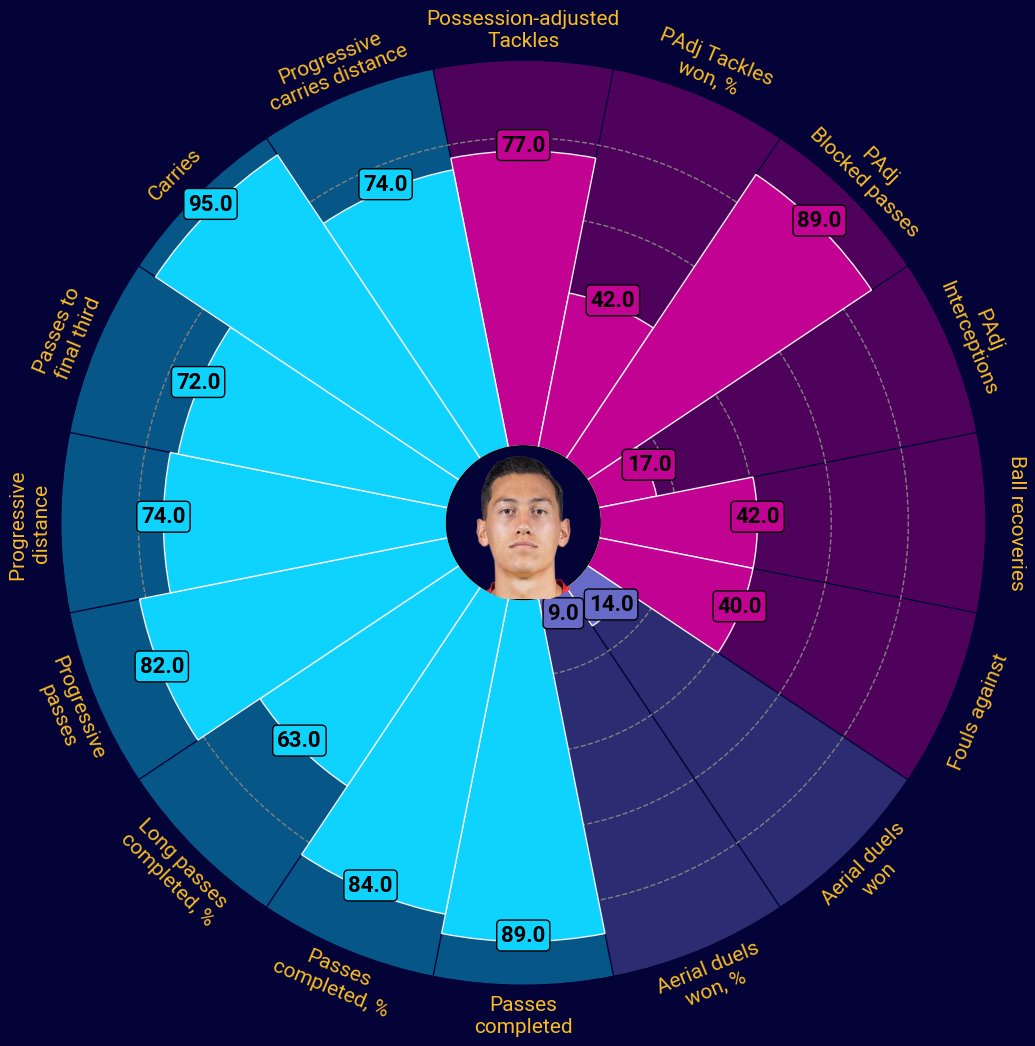

In [159]:
# Create the pizza chart

## Instantiate PyPizza class
baker = PyPizza(
    params=cbParams,  # list of parameters
    background_color="#030338",  # background color
    min_range=cbMinRanges,
    max_range=cbMaxRanges,
    straight_line_color="#030338",  # color for straight lines
    straight_line_lw=1,  # linewidth for straight lines
    last_circle_lw=0,  # linewidth of last circle
    other_circle_ls="--",  # linestyle for other circles
    other_circle_lw=1,  # linewidth for other circles
    inner_circle_size=20,  # size of inner circle
)

## Create a colormap
colors = ["#c20292", "#0dd3fe"]
cmap = LinearSegmentedColormap.from_list("TokyoNight", colors, N=len(subjectParams))
slice_colors = ["#c20292"] * 6 + ["#686ac8"] * 2 + ["#0dd3fe"] * 8
text_colors = ["#000000"] * len(slice_colors)

# Plot the pizza chart
fig, ax = baker.make_pizza(
    JayIdzesValues,
    figsize=(12, 12),
    color_blank_space="same",
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#F9BD25", fontsize=15, fontproperties=robotoRegular, va="center"
    ),  # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000",
        fontsize=16,
        fontproperties=robotoBold,
        zorder=3,
        bbox=dict(
            edgecolor="#000000",
            facecolor="cornflowerblue",
            boxstyle="round,pad=0.2",
            lw=1,
        ),
    ),  # values to be used when adding parameter-values
)

# Add an image of Jay Idzes to the plot
add_image(
    jayIdzes,
    fig,
    left=0.453,
    bottom=0.431,
    width=0.12,
    height=0.12,
)

<Axes: >

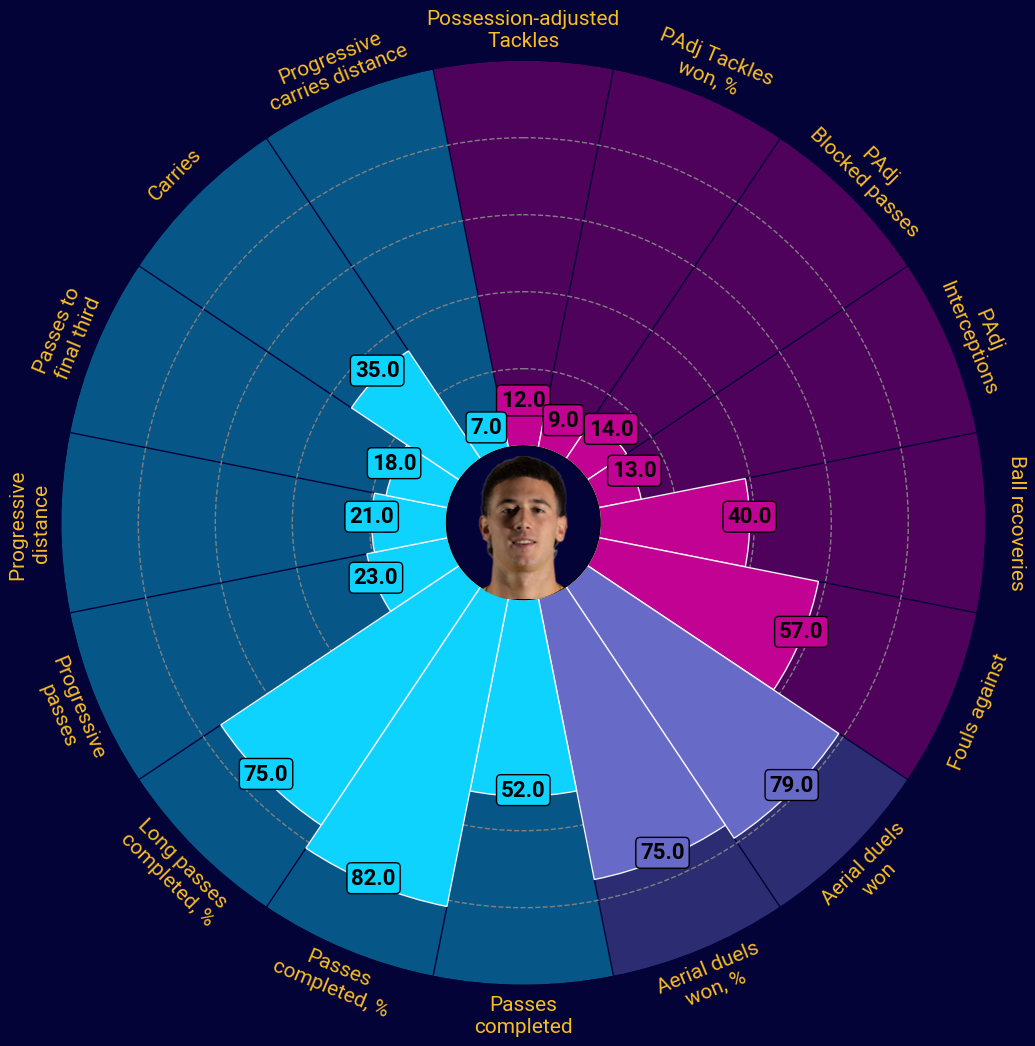

In [160]:
# Plot the pizza chart
fig, ax = baker.make_pizza(
    AlessandroCircatiValues,
    figsize=(12, 12),
    color_blank_space="same",
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#F9BD25", fontsize=15, fontproperties=robotoRegular, va="center"
    ),  # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000",
        fontsize=16,
        fontproperties=robotoBold,
        zorder=3,
        bbox=dict(
            edgecolor="#000000",
            facecolor="cornflowerblue",
            boxstyle="round,pad=0.2",
            lw=1,
        ),
    ),  # values to be used when adding parameter-values
)

# Add an image of Alessandro Circati to the plot
add_image(
    alessandroCircati,
    fig,
    left=0.453,
    bottom=0.431,
    width=0.12,
    height=0.12,
)

In [161]:
# Display the stats
cbStats[cbStats["Player"].isin(["Jay Idzes", "Alessandro Circati"])]

,Player,PAdjTkl,PAdjTklW%,PAdjBlkPass,PAdjInt,Recov,Fls,ArlWon,ArlWon%,PassCmp,PassCmp%,LngCmp%,PrgP,PrgDist,FinalThird,Carries,PrgCrDist
18,Alessandro Circati,0.48,51.7,0.15,0.48,4.16,1.07,2.99,65.1,43.3,87.8,63.7,2.35,266.7,1.60,30.3,53.3
29,Jay Idzes,0.94,61.4,0.41,0.49,4.21,1.24,1.63,49.4,54.5,87.9,59.4,4.12,372.9,3.35,42.4,99.4


In [162]:
cbPercentiles[cbPercentiles["Player"].isin(["Jay Idzes", "Alessandro Circati"])]

,Player,PAdjTkl,PAdjTklW%,PAdjBlkPass,PAdjInt,Recov,Fls,ArlWon,ArlWon%,PassCmp,PassCmp%,LngCmp%,PrgP,PrgDist,FinalThird,Carries,PrgCrDist
18,Alessandro Circati,12.0,9.0,14.0,13.0,40.0,57.0,79.0,75.0,52.0,82.0,75.0,23.0,21.0,18.0,35.0,7.0
29,Jay Idzes,77.0,42.0,89.0,17.0,42.0,40.0,14.0,9.0,89.0,84.0,63.0,82.0,74.0,72.0,95.0,74.0


In [164]:
avgPlaytime

,Squad,Time in play
0,Pisa,53.69
1,Parma,55.72
2,Calcio Lecco 1912,51.90
3,Catanzaro,59.67
4,Cosenza,50.17
5,Cremonese,59.85
6,Modena,53.78
7,Spezia,50.13
8,Palermo,58.46
9,Ternana,56.35
